# Laboratorio 3 - Algoritmos de Búsqueda

### Daniela Brenes Otárola
### Gabriel González Houdelath

1.a. Formule la tarea como un problema de búsqueda, definiendo el espacio
de estados, en el estado inicial, la prueba de objetivo, el conjunto de
acciones posibles y el costo de la ruta.
El laberinto presentado es el observado a continuacion:

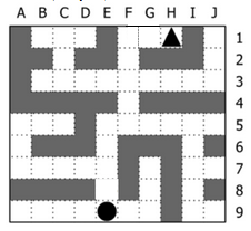

La propuesta de solucion para la busqueda del nodo final puede ser evidenciada en la siguiente imagen:

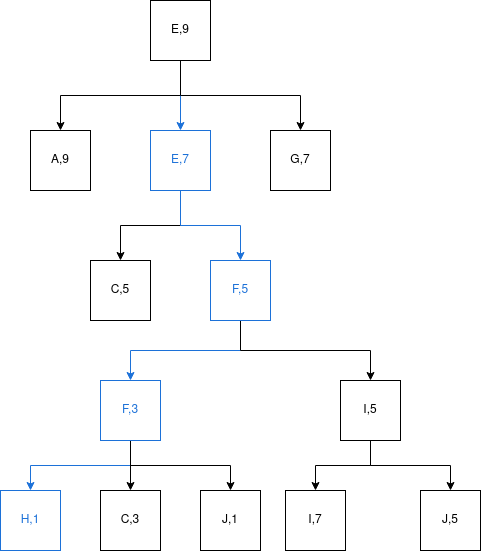

Estado Inicial: (E, 9)

Espacio de Estados: (E, 9) - (E, 7) - (F, 5) - (F, 3), (H,1)

Conjunto de Acciones Posibles: (A, 9) - (G,7) - (E, 7) - (C, 5) - (F, 5) - (F, 3) - (H,1) - (C, 3) - (J -1) -(I, 5) - (I, 7) - (J, 5)

Prueba Objetivo: (E, 9) - (E, 8) - (E, 7) - (E, 6) - (E, 5)- (F, 5) - (F, 4) - (F, 3)- (F, 2) - (F, 1) - (G, 1) - (H,1)

Costo de la Ruta: 12

1.b y 1.c

In [1]:
#Mapa del recorrido
mapa =      [[0,1,1,1,0,1,1,1,0,1],
            [0,0,1,0,0,1,0,0,0,1],
            [0,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,1,0,0,0,0],
            [1,1,1,0,1,1,1,1,1,1],
            [1,0,0,0,1,0,0,0,1,0],
            [1,1,1,1,1,0,1,0,1,1],
            [0,0,0,0,1,0,1,0,1,0],
            [1,1,1,1,1,1,1,0,1,1]]

#Clase del nodo del mapa en el grafo 

class Nodo:

  #Nodos adyacentes 
  
  arr = None #Nodo arriba inicializado 
  abaj = None #Nodo abajo inicializado 
  der = None #Nodo derecha inicializado 
  izq = None #Nodo izquierda inicializado

  #Incializacion de parametros
  def __init__(self, fila : chr, col: int, tipo: int):
    self.esPared = self.set_esPared(tipo) # tipo del nodo (pared o pasillo)
    self.fila = fila
    self.col = col
    self.id = self.setID(fila, col)
  
  def __str__(self):
    return self.id

  def set_esPared(self, cod : int) -> bool:
    return bool(cod)

  def setID(self, fila: int, col: int) -> str:
    col = chr(col + 65)
    fila += 1
    return f'{fila}{col}'
  
#Clase del grafo formado por nodos

class Grafo:
  
  #Inicializacion de parmateros

  def __init__(self, arrayMapa : list, costo: int):
    self.columnas = len(arrayMapa[0])
    self.filas = len(arrayMapa)
    self.dic = self.dic(arrayMapa) # dictionary to easily reference every node'
    self.setArco()
    self.costo = costo

  #Se crean todos los nodos y se agregan a diccionario para acceso

  def dic(self, arrayMapa : list):
 
    dic = {}
    for i in range(len(arrayMapa)):
      for j in range(len(arrayMapa[0])):
        nuevoNodo = Nodo(i,j,arrayMapa[i][j])
        dicKey = j + i * self.columnas
        dic[dicKey] = nuevoNodo
    return dic

  #Crea los arcos para cada nodo del grafo
  def setArco(self):
    for i in range(self.filas):
      for j in range(self.columnas):
        nodo = self.getNodo(i,j)
        if (i > 0):
          arr = self.getNodo(i-1, j)
          nodo.arr = arr
        if (i < self.filas - 1):
          abaj = self.getNodo(i+1,j)
          nodo.abaj = abaj
        if (j > 0):
          izq = self.getNodo(i, j-1)
          nodo.izq = izq
        if (j < self.columnas - 1):
          der = self.getNodo(i, j+1)
          nodo.der = der

  #Funcion para retornar nodo por fila y columna

  def getNodo(self,fila: int, col: int) -> Nodo:
  
    key = col + fila * self.columnas
    return self.dic[key]

  #Funcion para obtener los vecinos de un nodo

  def getVecino(self, nodo: Nodo) -> list:
    vecinos = []
    fila = nodo.fila
    col = nodo.col
    #Verifica nodos vecinos de arriba
    if (nodo.arr != None):
      if (nodo.arr.esPared):
        vecinos.append(nodo.arr)
    #Verifica nodos vecinos de la derecha
    if (nodo.der != None):
      if (nodo.der.esPared):
        vecinos.append(nodo.der)
    #Verifica nodos vecinos de abajo
    if (nodo.abaj != None):
      if (nodo.abaj.esPared):
        vecinos.append(nodo.abaj)
    #Verifica nodos vecinos de la izquierda
    if (nodo.izq != None):
      if (nodo.izq.esPared):
        vecinos.append(nodo.izq)

    return vecinos

  #Verifica que la fila no salga del rango
  def parseFila(self, fila: int):
    if (1 <= fila <= self.filas):
      return fila - 1
    raise ValueError("La fila esta fuera del rango")
  
  #Verifica que la columna no salga del rango
  def parseCol(self, col: str):
    if (isinstance(col, str) and len(col) == 1):
      col = ord(col) - 65
      if (0 <= col < self.columnas):
        return col
      raise ValueError("La fila esta fuera del rango")
    raise ValueError("La columna esta fuera del rango")

  #Funcion para obtener el camino recorrido
  def getCamino(self, anterior : dict, origen: Nodo, destino: Nodo) -> list:
      camino = [] #Si inicializa el camino
      actual = destino
      while actual != origen:
        camino.append(actual) #Hace append a la lista de camino por cada nodo visitado
        actual = anterior[actual]
      camino.append(origen)
      camino.reverse() #Hace un reverse para dar el order de inicio a fin
      return camino

  #Se obtiene el costo con el tamanio de la lista de nodos visitados
  def getCosto(self, visitados: dict) -> int:
    return len(visitados) * self.costo


  #Algoritmo anchura primero inicializado con fila y columna de origen y destino
  def anchura(self, filaOrigen: int, colOrigen: str, filaDestino: int, colDestino: str) -> dict :

    #Se parsea la fila y columna de origen
    filaOrigen = self.parseFila(filaOrigen)
    colOrigen = self.parseCol(colOrigen)
    origen = self.getNodo(filaOrigen, colOrigen) #Define el nodo con la fila y columna verificada

    #Se parsea la fila y columna destino
    filaDestino = self.parseFila(filaDestino)
    colDestino = self.parseCol(colDestino)
    destino = self.getNodo(filaDestino, colDestino)#Define el nodo con la fila y columna verificada

    frontera = [] #Lista de nodos frontera
    frontera.append(origen)
    anterior = dict()
    anterior[origen] = None

    while len(frontera) > 0:
      actual = frontera.pop(0) #se obtiene el primer nodo frontera
      if actual == destino: #SE verifica si se llego al final
        break

      vec = self.getVecino(actual)
      for sig in vec:
        if sig not in anterior:
          frontera.append(sig)
          anterior[sig] = actual

    #Se obtiene el camino, costo y la lista final de nodos visitados
    camino = self.getCamino(anterior, origen, destino)
    costo = self.getCosto(anterior)
    visitados = list(anterior.keys())
    contVisitados = len(anterior)
    return {'camino': camino, 'costo': costo, 'visitados': visitados, 'cantVisitados': contVisitados}

  
  #Algoritmo de profundiad primero recibiendo fila y columna de origen y final
  def profundidad(self, filaOrigen: int, colOrigen: str, filaDestino: int, colDestino: str) -> dict :

    #Se parsea la fila y columna de origen
    filaOrigen = self.parseFila(filaOrigen)
    colOrigen = self.parseCol(colOrigen)
    origen = self.getNodo(filaOrigen, colOrigen) #Se obtiene el nodo de origen

    #Se parsea la fila y columna destino
    filaDestino = self.parseFila(filaDestino)
    colDestino = self.parseCol(colDestino)
    destino = self.getNodo(filaDestino, colDestino) #Se obtiene el nodo de origen

    anterior = dict() #Se guarda el camino de atras a adelante
    anterior[origen] = None

    #Funcion auxiliar recursiva de profundiad
    def profundidadAux(actual: Nodo, destino: Nodo, anterior: dict):
      vec = self.getVecino(actual)
      if (actual == destino or len(vec) == 0):
        return
      for sig in vec:
        if sig not in anterior: #Se verifica si no ha pasado por nodos repetidos
          anterior[sig] = actual
          return profundidadAux(sig, destino, anterior)

    profundidadAux(origen, destino, anterior)

    #Se obtiene el camino, costo, nodos visitados y la cantidad
    camino = self.getCamino(anterior, origen, destino)
    costo = self.getCosto(anterior)
    visitados = list(anterior.keys())
    contVisitados = len(anterior)
    return {'camino': camino, 'costo': costo, 'visitados': visitados, 'cantVisitados': contVisitados}
      
      

#Programa principal con costo 1 por cada nodo visitado
costo = 1
graph = Grafo(mapa, costo)

# Busqueda por anchura primero con 9E como inicial y 1H como destino
bap = graph.anchura(9,'E', 1, 'H')
print("Busqueda anchura primero")
print("\nCamino:")
for nodo in bap['camino'][:-1]:
  print(f'{nodo} ->', end=' ')
print(bap['camino'][-1])

print(f'\nCantidad de nodos visitados: {bap["cantVisitados"]}')

print(f'\nNodos visitados:')
for nodo in bap['visitados'][:-1]:
  print(f'{nodo},', end=' ')
print(bap['visitados'][-1])

print(f'\nCosto ({costo} por nodo visitado): {bap["costo"]}')

print("-----------------------------------------------------------------------")

# Busqueda por profundidad primero con 9E como inicial y 1H como destino
bpp = graph.profundidad(9,'E', 1, 'H')
print("\n\nBusqueda profundidad primero")
print("\nCamino:")
for nodo in bpp['camino'][:-1]:
  print(f'{nodo} ->', end=' ')
print(bpp['camino'][-1])

print(f'\nCantidad de nodos visitados: {bpp["cantVisitados"]}')

print(f'\nNodos visitados:')
for nodo in bpp['visitados'][:-1]:
  print(f'{nodo},', end=' ')
print(bpp['visitados'][-1])

print(f'\nCosto ({costo} por nodo visitado): {bpp["costo"]}')



Busqueda anchura primero

Camino:
9E -> 8E -> 7E -> 6E -> 5E -> 5F -> 4F -> 3F -> 2F -> 1F -> 1G -> 1H

Cantidad de nodos visitados: 45

Nodos visitados:
9E, 8E, 9F, 9D, 7E, 9G, 9C, 6E, 7D, 8G, 9B, 5E, 7C, 7G, 9A, 5F, 7B, 4F, 5G, 7A, 3F, 5H, 6A, 2F, 3G, 3E, 5I, 5A, 1F, 3H, 3D, 5J, 6I, 5B, 1G, 3I, 3C, 7I, 5C, 1H, 3J, 2C, 3B, 7J, 8I

Costo (1 por nodo visitado): 45
-----------------------------------------------------------------------


Busqueda profundidad primero

Camino:
9E -> 8E -> 7E -> 6E -> 5E -> 5F -> 4F -> 3F -> 2F -> 1F -> 1G -> 1H

Cantidad de nodos visitados: 12

Nodos visitados:
9E, 8E, 7E, 6E, 5E, 5F, 4F, 3F, 2F, 1F, 1G, 1H

Costo (1 por nodo visitado): 12
